In [3]:
# 구동문
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# seaborn dataset
# ['anagram', 'anscombe', 'attention', 'brain_networks', 'car_carshes',
# 'diamonds', 'dots', 'dowjones', 'exercise', 'filights', 'fmri', 'geyser', 'glue', 
# 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'titanic']


In [4]:
df = sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


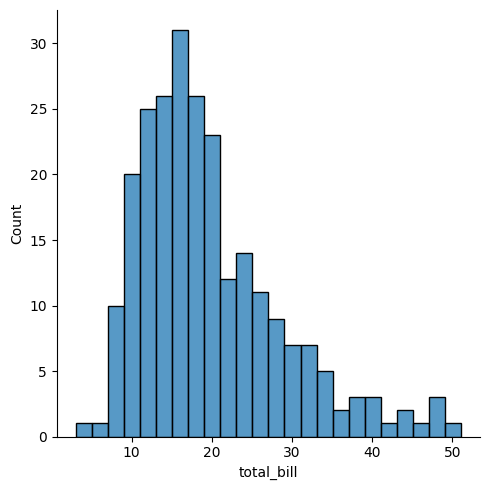

In [5]:
sns.displot(data=df, x='total_bill', binwidth=2)
# displot은 분포도를 알아보기 좋은 그래프이다.
# binwidth는 category별 너비임

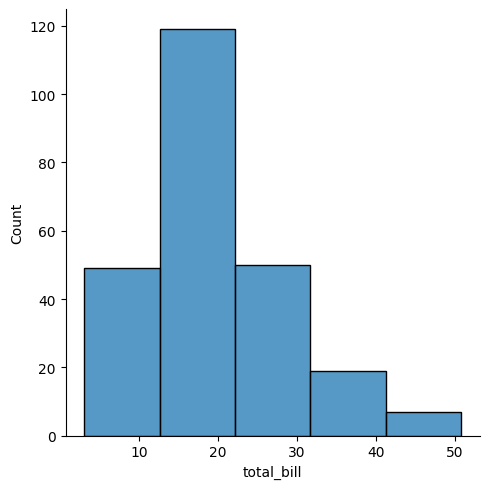

In [6]:
sns.displot(data=df, x='total_bill', bins=5)
# 너비를 안주고 bins로 바 갯수만 주면 알아서 너비를 맞춰준다.
# 이간단한 작업을 subplot으로 하려면 먼저 데이터를 category별로 나누어 주어야한다.

In [7]:
a = pd.cut(df['total_bill'], bins=5)
a.unique
# 데이터 분포별 category를 bins갯수에 맞춰서 짤라서 나누어 주었다.

<bound method Series.unique of 0      (12.618, 22.166]
1       (3.022, 12.618]
2      (12.618, 22.166]
3      (22.166, 31.714]
4      (22.166, 31.714]
             ...       
239    (22.166, 31.714]
240    (22.166, 31.714]
241    (22.166, 31.714]
242    (12.618, 22.166]
243    (12.618, 22.166]
Name: total_bill, Length: 244, dtype: category
Categories (5, interval[float64, right]): [(3.022, 12.618] < (12.618, 22.166] < (22.166, 31.714] < (31.714, 41.262] < (41.262, 50.81]]>

In [8]:
print(a)

0      (12.618, 22.166]
1       (3.022, 12.618]
2      (12.618, 22.166]
3      (22.166, 31.714]
4      (22.166, 31.714]
             ...       
239    (22.166, 31.714]
240    (22.166, 31.714]
241    (22.166, 31.714]
242    (12.618, 22.166]
243    (12.618, 22.166]
Name: total_bill, Length: 244, dtype: category
Categories (5, interval[float64, right]): [(3.022, 12.618] < (12.618, 22.166] < (22.166, 31.714] < (31.714, 41.262] < (41.262, 50.81]]


<BarContainer object of 5 artists>

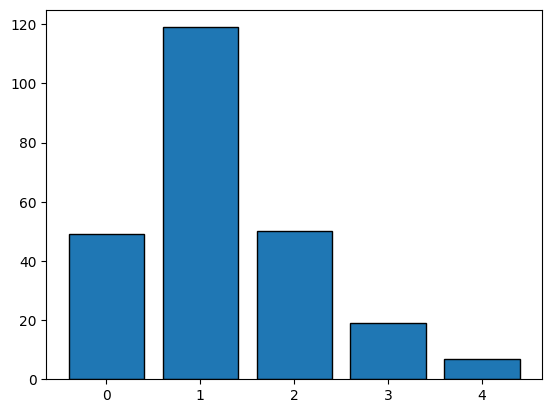

In [9]:
b = a.value_counts().sort_index()
_,axe = plt.subplots()
axe.bar(x=np.arange(len(b.index)), height=b.to_numpy(), edgecolor='black')
# 새로운 객체의 category별 횟수, 갯수를 index별로 넣어주고 
# plot하게 되면 밑 그림과 같은 plot 형태를 알 수 있다.

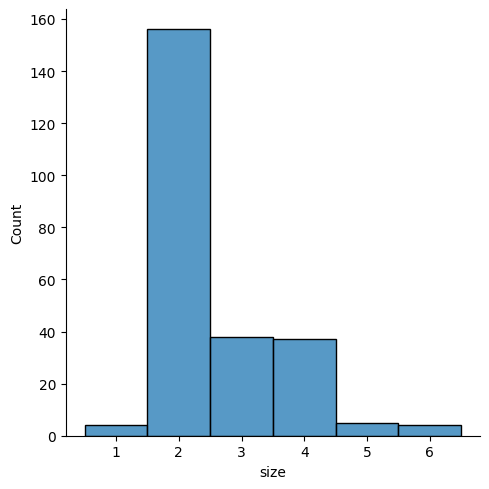

In [10]:
sns.displot(data=df, x='size', discrete=True)
# 아룰 displot으로 그리면 굉장히 간단해지는 것.
# discrete하게 될 경우 binwidth로 조절이 불가능해서 shrink로 너비를 정해 줄 수 있다.

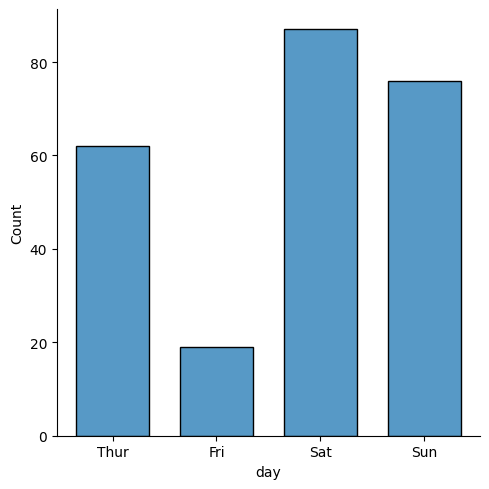

In [11]:
sns.displot(data=df, x='day', shrink=0.7)

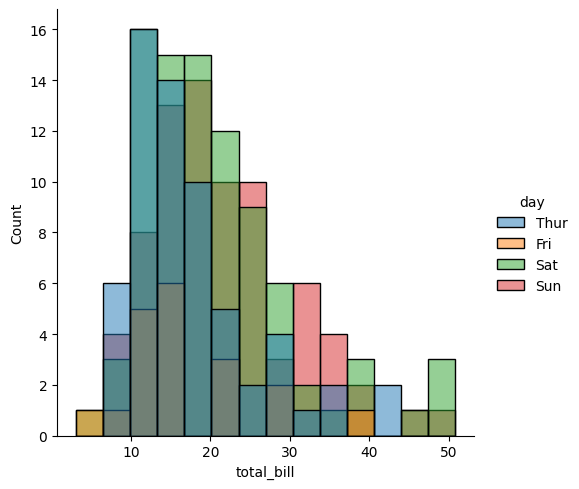

In [12]:
# 다음과 replot과 마찬가지로 hue를 줄 수 있다.
# 주게되면 밑 그림 처럼 label별로 색깔이 정해진다.
sns.displot(data=df, x='total_bill', hue='day')

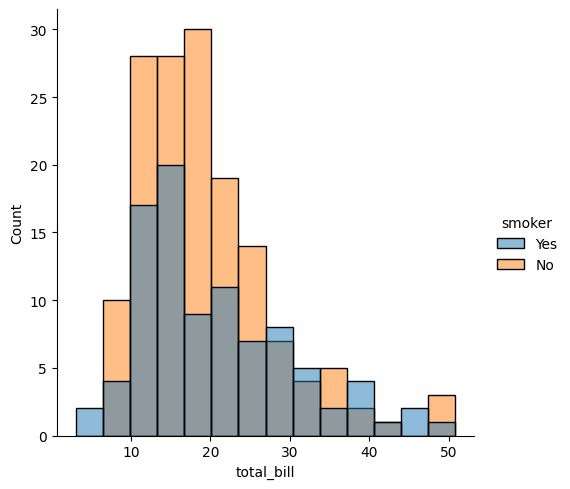

In [13]:
sns.displot(data=df, x='total_bill', hue='smoker')

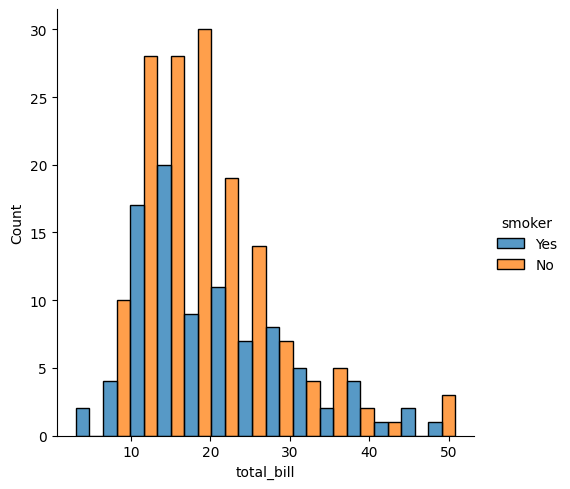

In [ ]:
# 다음은 multiple
sns.displot(data=df, x='total_bill', hue='smoker', multiple='dodge')

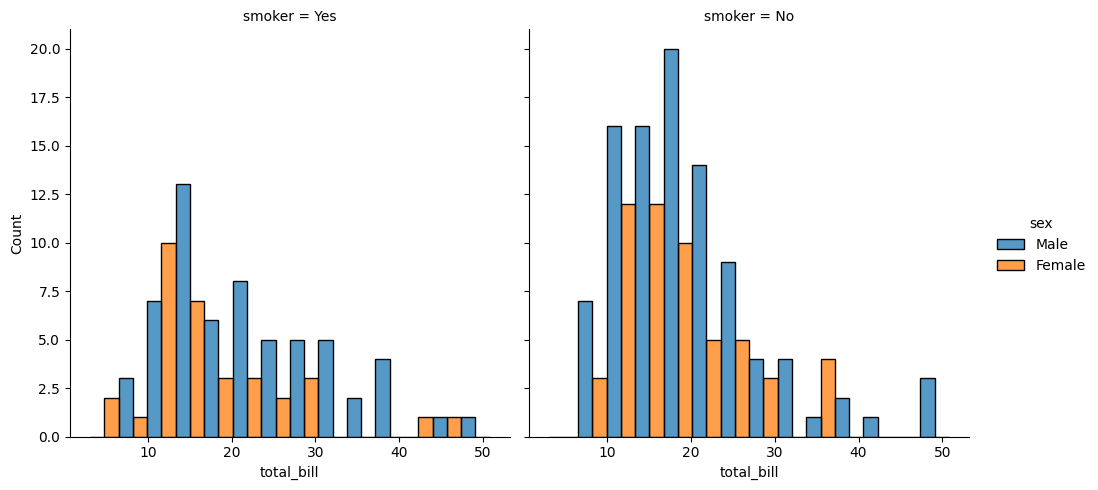

In [ ]:
# layers가 기본값이고 dodge는 smoker hue별로 그래프를 쌓는 것이 아닌 따로 피해서 만들어 준다.
# 그리고 stack hue별로 쌓아서 표현해준다. layer는 포함시켜서 어두운 그래프를 만들어준다는 것에서 차이가 있다.
# fill은 한 axe를 다 채워서 막대그래프를 만들어줌.

sns.displot(data=df, x='total_bill', col='smoker', hue='sex', multiple='dodge')

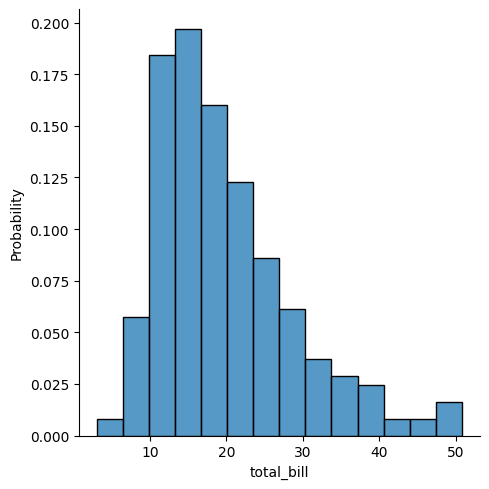

In [ ]:
# col; column을 만들어주면 정해준 column별로 따로 만둘 수 있다.
# 이것도 matplotlib썻으면 적어도 네, 다섯줄,,
sns.displot(data=df, x='total_bill', stat='probability')
# Hist의 stat 매개변수는 [count, density, percent, probability, frequency]

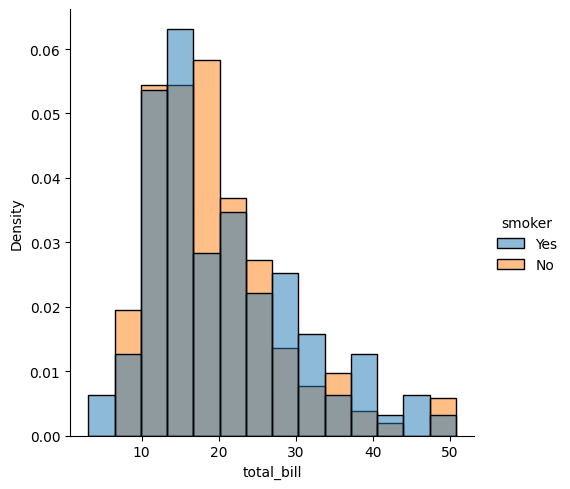

In [ ]:
# stat을 줄 수도있다. stat은 count가 기본값이고, frequency폭을 count로 나눈 값
# probability은 확률이다. height 총합으로 나눈것. 정규화 시켰다고 볼 수 있겠다. 다 더하면 1이됨
# percent는 다 더하면 100이 된다. 그리고 density는 면적을 다 더하면 1이됨!
sns.displot(data=df, x='total_bill', hue='smoker', stat='density', common_norm=False)

normalize는 전체 값으로 category별로 맞추는 것이다.
common_norm을 False로 두고 hue별로 다 더하면 1이 된다.
True로 두면 둘 다 다 더해야 1이 되는것. True가 defalt



다음으로는 dispot에 있는 ecdf.
누적값을 계속 더해가는 그래프로 보통 기울기를 볼려고 쓴다.
경향확인하기에 좋아요

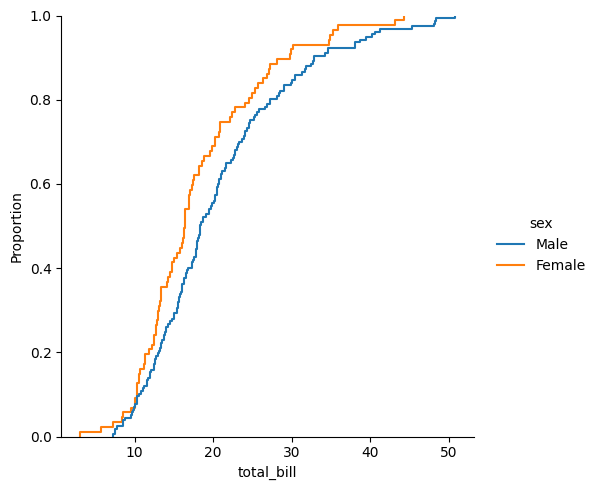

In [ ]:
sns.displot(data=df, x='total_bill', kind='ecdf', hue='sex')

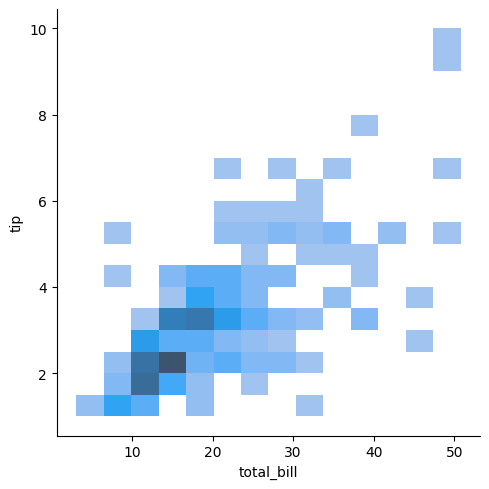

In [ ]:
# 다음으로 count를 보는 것이 아닌 따로Y값을 설정 해 두었을 때 이다.
sns.displot(data=df, x='total_bill', y='tip')

위 그림처럼 네모난 셀에 색깔에 따라 더 많이 분포해있는 지를 볼 수 있다.

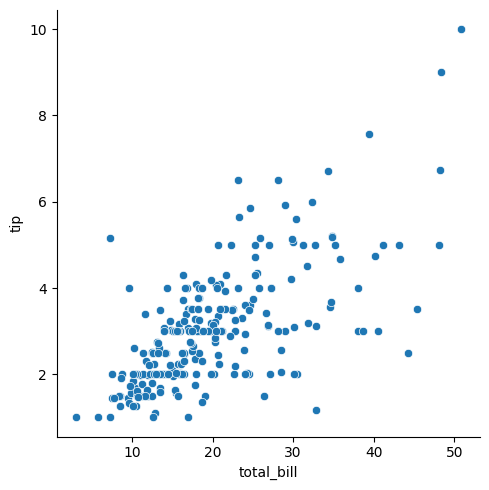

In [ ]:
sns.relplot(data=df, x='total_bill', y='tip')

위 처럼 relplot으로 보거나 displot 둘 중 쓰면 될 것 같다.

하지만 displot 색깔에 따라 어떻게 다른지 모른다.
cbar를 True로 두면 옆에 막대 그래프가 하나 뜬다. 이거 벌로 나뉜거임

다음으로 kind를 kde로 두면 등고선 형태로 제일 높은 밀도를 가진 cell쪽에 가운데 동그라미 안쪽이 된다.

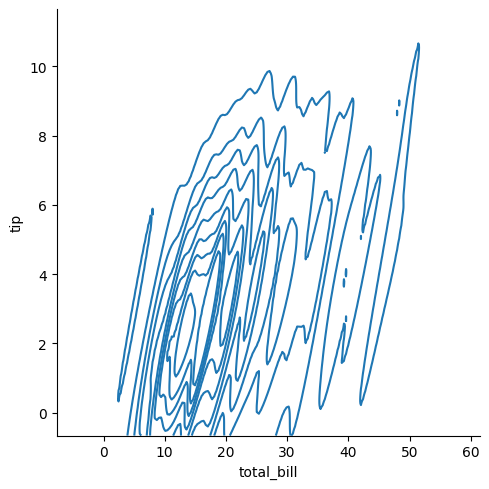

In [ ]:
sns.displot(data=df, x='total_bill', y='tip', kind='kde')

density가 높은데서 부터 퍼지게 보이려면 thresh를 낮출수록 퍼진다.

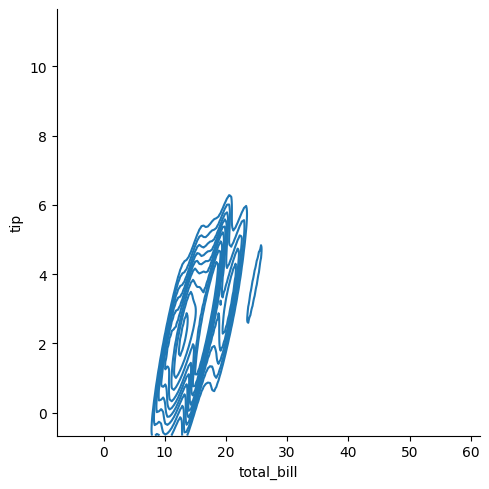

In [ ]:
sns.displot(data=df, x='total_bill', y='tip', kind='kde', thresh=0.5)

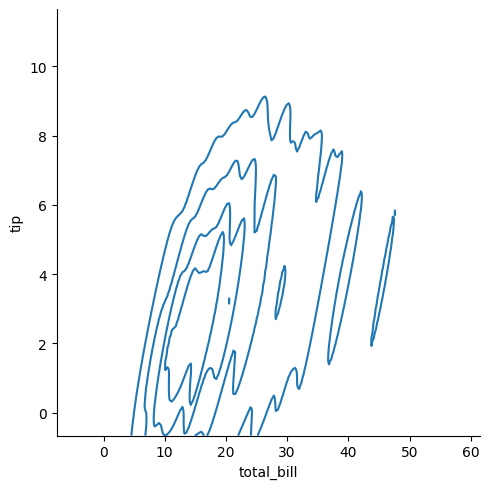

In [ ]:
sns.displot(data=df, x='total_bill', y='tip', kind='kde', thresh=0.1, levels=5)

levels는 선의 갯수!

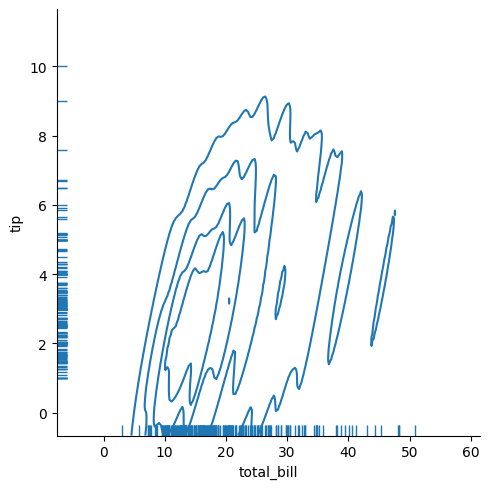

In [ ]:
sns.displot(data=df, x='total_bill', y='tip', kind='kde', thresh=0.1, levels=5, rug=True)

rug를 True로 주면 x축 y축에 짝대기가 그려짐. 밀도 높을 수록 많이 그려저서 진해진다.

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

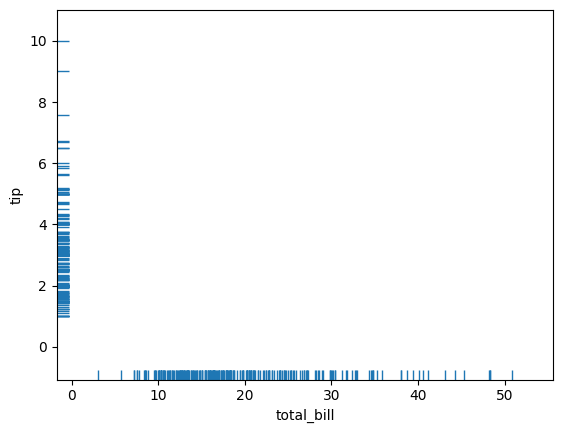

In [ ]:
sns.rugplot(data=df, x='total_bill', y='tip')

위 그럼처럼 rugplot으로 막대기만 따로 그릴 수도 있음. 근데 너무 시각적으로 조금 부족해서 보통 다른 plot이랑 같이 쓰는 편

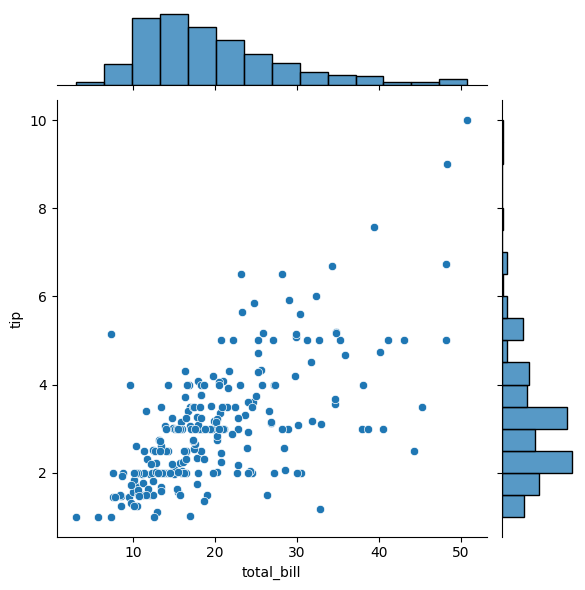

In [ ]:
# Joinplot => seabron의 꽃
sns.jointplot(data=df, x='total_bill', y='tip')
# 아래 그림을 matplotlib으로 그릴려면 한숨부터 나올 것이다.
# 안쪽은 relplot, 바깥쪽은 barplot형태로 나옴

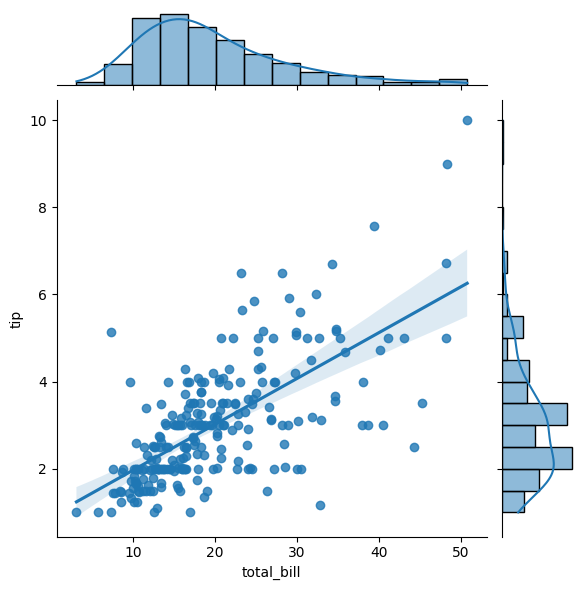

In [ ]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='reg')

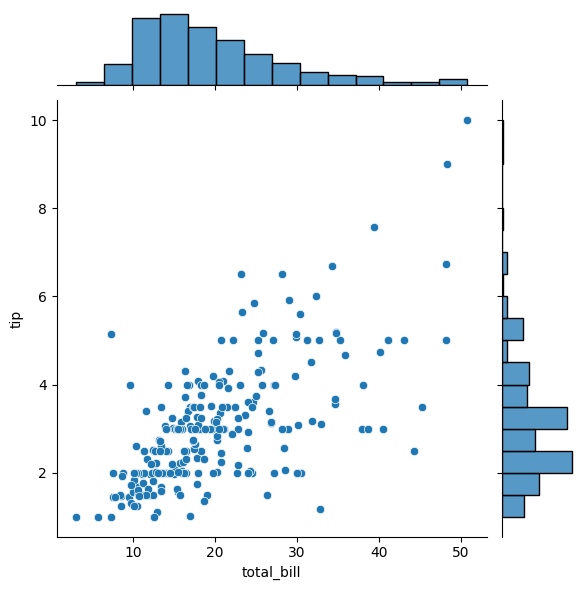

In [ ]:
# reg말고도 scatter, kde, hist, hex, resid와 같은 많은 종류들이 있다.
# joinplot을 마음대로 편하게 쓸려면

j = sns.jointplot(data=df, x='total_bill', y='tip')
j.plot_joint(sns.scatterplot)

In [16]:
plt.rcParams['figure.figsize'] = [15, 10] # size 지정
flights = sns.load_dataset('flights') # 여객운송 데이터
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
